<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2003%20-%20Runge%20Kutta/301_2nd%20Order%20Runge%20Kutta%20Population%20Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application of 2nd order Runge Kutta to Populations Equations

This notebook implements the 2nd Order Runge Kutta method for three different population intial value problems.

# 2nd Order Runge Kutta
The general 2nd Order Runge Kutta method for to the first order differential equation
\begin{equation} y^{'} = f(t,y) \end{equation}
numerical approximates $y$ the at time point $t_i$ as $w_i$
with the  formula:
\begin{equation} w_{i+1}=w_i+\frac{h}{2}\big[k_1+k_2],\end{equation}
for $i=0,...,N-1$, where 
\begin{equation}k_1=f(t_i,w_i),\end{equation}
and
\begin{equation}k_2=f(t_i+h,w_i+hk_1),\end{equation}
and $h$ is the stepsize.

To illustrate the method we will apply it to three intial value problems:
## 1. Linear 
Consider the linear population Differential Equation
\begin{equation} y^{'}=0.1y, \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}

## 2. Non-Linear Population Equation 
Consider the non-linear population Differential Equation
\begin{equation} y^{'}=0.2y-0.01y^2, \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}

## 3. Non-Linear Population Equation with an oscillation 
Consider the non-linear population Differential Equation with an oscillation 
\begin{equation} y^{'}=0.2y-0.01y^2+\sin(2\pi t), \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}

### Setting up Libraries

In [1]:
## Library
import numpy as np
import math 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")



### Discrete Interval
The continuous time $a\leq t \leq b $ is discretised into $N$ points seperated by a constant stepsize
\begin{equation} h=\frac{b-a}{N}.\end{equation}
Here, the interval is $2000\leq t \leq 2020,$ 
\begin{equation} h=\frac{2020-2000}{200}=0.1.\end{equation}
This gives the 201 discrete points:
\begin{equation} t_0=2000, \ t_1=2000.1, \ ... t_{200}=2020. \end{equation}
This is generalised to 
\begin{equation} t_i=2000+i0.1, \ \ \ i=0,1,...,200.\end{equation}
The plot below shows the discrete time steps:

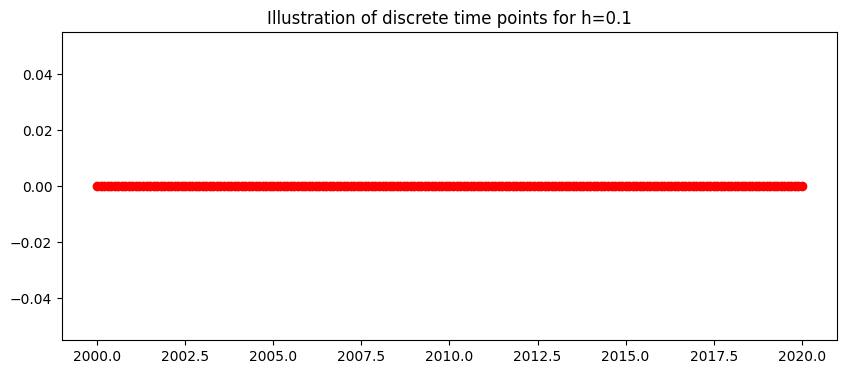

In [2]:
N=200
t_end=2020.0
t_start=2000.0
h=((t_end-t_start)/N)
t=np.arange(t_start,t_end+h/2,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.show()

# 1. Linear Population Equation
## Exact Solution 
The linear population equation
\begin{equation} y^{'}=0.1y, \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation} y(2000)=6.\end{equation}
has a known exact (analytic) solution
\begin{equation} y=6e^{0.1(t-2000)}. \end{equation}

### Specific 2nd Order Runge Kutta 
To write the specific 2nd Order Runge Kutta method for the linear population equation we need 
\begin{equation}f(t,y)=0.1y.\end{equation}

In [3]:
def linfun(t,w):
    ftw=0.1*w
    return ftw

this gives
\begin{equation}k_1=f(t_i,w_i)=0.lw_i,\end{equation}
\begin{equation}k_2=f(t_i+h,w_i+hk_1)=0.1(w_i+hk_1),\end{equation}
and the difference equation
\begin{equation}w_{i+1}=w_{i}+\frac{h}{2}(k_1+k_2),\end{equation}
for $i=0,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with step size $h$ and the initial condition
\begin{equation}w_0=6.\end{equation}

In [4]:
w=np.zeros(N+1)
w[0]=6.0
## 2nd Order Runge Kutta
for k in range (0,N):
    k1=linfun(t[k],w[k])
    k2=linfun(t[k]+h,w[k]+h*k1)
    w[k+1]=w[k]+h/2*(k1+k2)

### Plotting Results

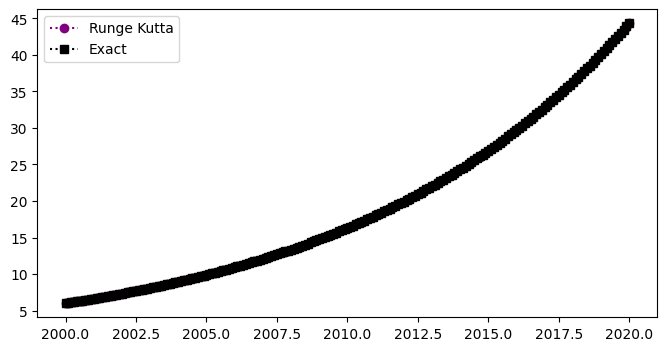

In [5]:
y=6*np.exp(0.1*(t-2000))
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='Runge Kutta')
plt.plot(t,y,'s:',color='black',label='Exact')
plt.legend(loc='best')
plt.show()

### Table
The table below shows the time, the Runge Kutta numerical approximation, $w$,  the exact solution, $y$, and the exact error $|y(t_i)-w_i|$ for the linear population equation:

In [6]:

d = {'time t_i': t[0:10],    'Runge Kutta':w[0:10],'Exact (y)':y[0:10],'Exact Error':np.abs(np.round(y[0:10]-w[0:10],10))}
df = pd.DataFrame(data=d)
df

,time t_i,Runge Kutta,Exact (y),Exact Error
0,2000.0,6.000000,6.000000,0.000000
1,2000.1,6.060300,6.060301,0.000001
2,2000.2,6.121206,6.121208,0.000002
3,2000.3,6.182724,6.182727,0.000003
4,2000.4,6.244861,6.244865,0.000004
5,2000.5,6.307621,6.307627,0.000005
6,2000.6,6.371013,6.371019,0.000006
7,2000.7,6.435042,6.435049,0.000007
8,2000.8,6.499714,6.499722,0.000009
9,2000.9,6.565036,6.565046,0.000010


## 2. Non-Linear Population Equation 
\begin{equation} y^{'}=0.2y-0.01y^2, \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}
### Specific 2nd Order Runge Kutta for the Non-Linear Population Equation
To write the specific 2nd Order Runge Kutta method we need
\begin{equation}f(t,y)=0.2y-0.01y^2,\end{equation}
this gives
\begin{equation}k_1=f(t_i,w_i)=0.2w_i-0.01w_i^2,\end{equation}
\begin{equation}k_2=f(t_i+h,w_i+hk_1)=0.2(w_i+hk_1)-0.01(w_i+hk_1)^2,\end{equation}
and the difference equation
\begin{equation}w_{i+1}=w_{i}+\frac{h}{2}(k_1+k_2),\end{equation}
for $i=0,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with step size $h$ and the initial condition
\begin{equation}w_0=6.\end{equation}

In [7]:
def nonlinfun(t,w):
    ftw=0.2*w-0.01*w*w
    return ftw

In [8]:
w=np.zeros(N+1)
w[0]=6.0
## 2nd Order Runge Kutta
for k in range (0,N):
    k1=nonlinfun(t[k],w[k])
    k2=nonlinfun(t[k]+h,w[k]+h*k1)
    w[k+1]=w[k]+h/2*(k1+k2)

### Results
The plot below shows the Runge Kutta numerical approximation, $w$ (circles) for the non-linear population equation:

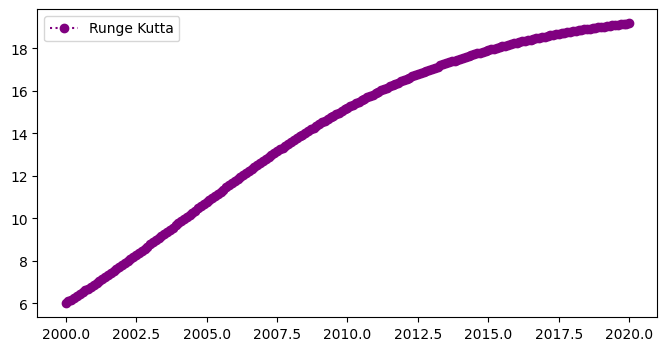

In [9]:
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='Runge Kutta')
plt.legend(loc='best')
plt.show()

### Table
The table below shows the time and the Runge Kutta numerical approximation, $w$,  for the non-linear population equation:

In [10]:
d = {'time t_i': t[0:10], 
     'Runge Kutta':w[0:10]}
df = pd.DataFrame(data=d)
df

,time t_i,Runge Kutta
0,2000.0,6.000000
1,2000.1,6.084332
2,2000.2,6.169328
3,2000.3,6.254977
4,2000.4,6.341270
5,2000.5,6.428197
6,2000.6,6.515747
7,2000.7,6.603909
8,2000.8,6.692672
9,2000.9,6.782025


## 3. Non-Linear Population Equation with an oscilation 
\begin{equation} y^{'}=0.2y-0.01y^2+\sin(2\pi t), \ \ (2000 \leq t \leq 2020), \end{equation}
with the initial condition,
\begin{equation}y(2000)=6.\end{equation}

### Specific 2nd Order Runge Kutta for the Non-Linear Population Equation with an oscilation
To write the specific 2nd Order Runge Kutta difference equation for the intial value problem we need 
\begin{equation}f(t,y)=0.2y-0.01y^2+\sin(2\pi t),\end{equation}
which gives
\begin{equation}k_1=f(t_i,w_i)=0.2w_i-0.01w_i^2+\sin(2\pi t_i),\end{equation}
\begin{equation}k_2=f(t_i+h,w_i+hk_1)=0.2(w_i+hk_1)-0.01(w_i+hk_1)^2+\sin(2\pi (t_i+h)),\end{equation}
and the difference equation
\begin{equation}w_{i+1}=w_{i}+\frac{h}{2}(k_1+k_2),\end{equation}
for $i=0,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with step size $h$ and the initial condition
\begin{equation}w_0=6.\end{equation}

In [11]:
def nonlin_oscfun(t,w):
    ftw=0.2*w-0.01*w*w+np.sin(2*np.math.pi*t)
    return ftw

In [12]:
w=np.zeros(N+1)
w[0]=6.0
## 2nd Order Runge Kutta
for k in range (0,N):
    k1=nonlin_oscfun(t[k],w[k])
    k2=nonlin_oscfun(t[k]+h,w[k]+h*k1)
    w[k+1]=w[k]+h/2*(k1+k2)

### Results
The plot below shows the 2nd order Runge Kutta numerical approximation, $w$ (circles) for the non-linear population equation:

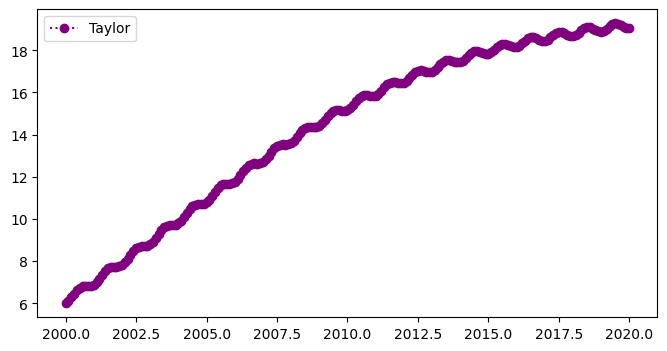

In [13]:
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='Taylor')
plt.legend(loc='best')
plt.show()

## Table
The table below shows the time and the 2nd order Runge Kutta numerical approximation, $w$,  for the non-linear population equation:

In [14]:
d = {'time t_i': t[0:10], 
     'Runge Kutta':w[0:10]}
df = pd.DataFrame(data=d)
df

,time t_i,Runge Kutta
0,2000.0,6.000000
1,2000.1,6.113722
2,2000.2,6.276109
3,2000.3,6.458005
4,2000.4,6.623032
5,2000.5,6.741504
6,2000.6,6.801784
7,2000.7,6.814712
8,2000.8,6.809444
9,2000.9,6.822305
